In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

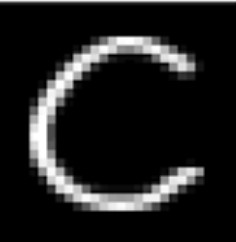

In [12]:
img = Image.open("C.jpg")
img

In [13]:
trans = transforms.Compose([transforms.ToTensor()])
transimg = trans(img)

In [14]:
model = torchvision.models.shufflenet_v2_x0_5(pretrained=False)
model.fc = torch.nn.Linear(1024,26)

In [15]:
model.load_state_dict(torch.load('xyz_epoch_50.pt'))

<All keys matched successfully>

In [16]:
model.eval()
with torch.no_grad():
    output = model(transimg.unsqueeze(0))

In [17]:
output

tensor([[ 259.9782,  135.8642,   14.2693,   10.1550,   91.4886,  -85.6855,
           59.7598,   98.3625, -147.6480,  -82.6447,   21.5579,   57.9082,
         -117.8824,   -7.7199,    0.4825,  -20.7187,   -6.2870,  171.6792,
          167.0989, -103.3710, -125.8104, -158.6588,  -47.0478, -146.5396,
           -9.8511,   28.3023]])

In [18]:
classes = []
for i in range(25):
  classes.append(chr(65+i))

In [19]:
classes[torch.argmax(output).item()]

'A'